In [4]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/SOC 128D"

#Packages for working with data
# Modin is a drop-in replacement for pandas, with multiple advantages
!pip install "modin[dask]"
import modin.pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load the temps.csv dataframe into your environment. Write a function that transforms the Fahrenheit temperatures to Celsius, and create a new variable for the Celsius temperatures.

In [5]:
def f_to_celsius(f):
  return round((f - 32) * 5/9, 1)

temps_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/temps.csv")
temps_df.insert(len(temps_df.columns), "Annual Average Temperature (C)", f_to_celsius(temps_df["Annual Average Temperature (F)"]))
temps_df

,Year,Annual Average Temperature (F),Annual Average Temperature (C)
0,1875,52.5,11.4
1,1876,51.5,10.8
2,1877,52.0,11.1
3,1878,52.5,11.4
4,1879,52.7,11.5
...,...,...,...
144,2019,53.6,12.0
145,2020,55.7,13.2
146,2021,56.3,13.5
147,2022,55.9,13.3


2. Try out the gtrendsR package! Load it into your machine, library it, and try searching for one or more environmental keywords of your choosing (e.g. “carbon sequestration”, “hurricane harvey”, “fossil fuels”, “climate justice”, etc.). Plot these keywords over time, and see if you can explain the spikes and dips in searches.

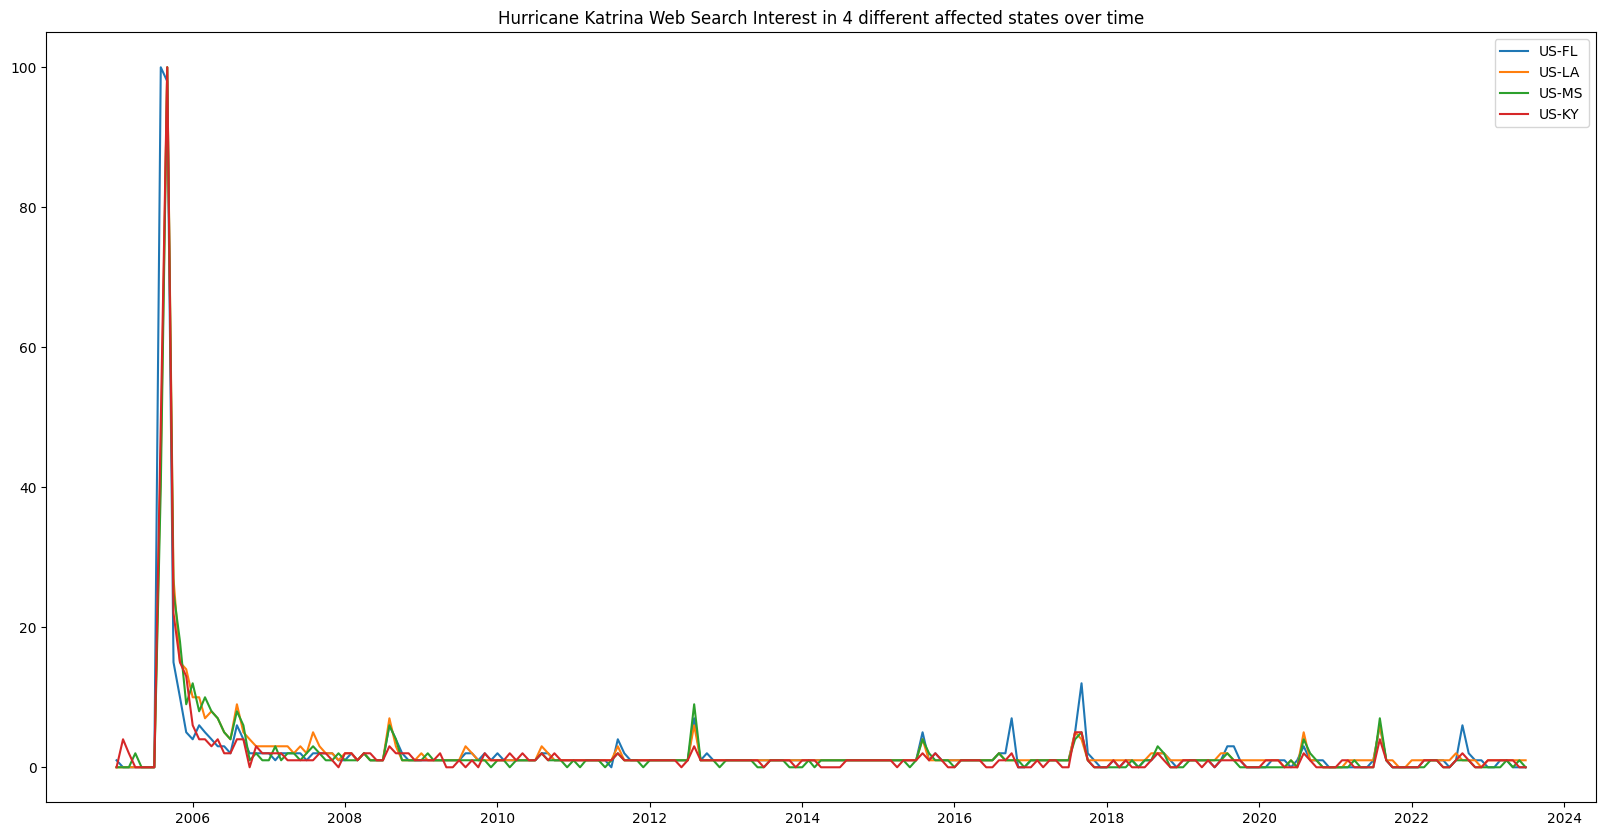

In [6]:
# Pytrends implements Google Trends
!pip install pytrends
from pytrends.request import TrendReq

requests_args = {
    "headers": {
      "Host": "trends.google.com",
      "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/111.0",
      "Accept": "application/json, text/plain, */*",
      "Accept-Language": "en-US,en;q=0.5",
      "Accept-Encoding": "gzip, deflate, br",
      "Alt-Used": "trends.google.com",
      "Connection": "keep-alive",
      "Referer": "https://trends.google.com/",
      "Cookie": "...",
      "Sec-Fetch-Dest": "empty",
      "Sec-Fetch-Mode": "cors",
      "Sec-Fetch-Site": "same-origin",
      "TE": "trailers"
  }
}

pytrends = TrendReq(hl='en-US', tz=360, requests_args=requests_args)
kw_list = ["Hurricane Katrina"]
geo_codes = ["US-FL", "US-LA", "US-MS", "US-KY"]
fig, ax = mplt.subplots(figsize=(20,10))
for geo_code in geo_codes:
  pytrends.build_payload(kw_list, timeframe='2005-01-01 2023-07-01', geo=geo_code)
  hk_df = pytrends.interest_over_time()

  for kw in kw_list:
      ax.plot(hk_df.index, hk_df[kw])

ax.set_title('Hurricane Katrina Web Search Interest in 4 different affected states over time')
ax.legend(geo_codes)
mplt.show()

I plotted Hurricane Katrina over time from 2005 to 2023 for 4 different states as described in the [wikipedia page](https://en.wikipedia.org/wiki/Hurricane_Katrina#:~:text=On%20August%2029%2C%202005%2C%20Hurricane,surge%20affected%20the%20Louisiana%20coast.) which records the states of Florida, Lousiana (specifically New Orleans), Mississippi and Alabama.

This looks mostly accurate, as the wikipedia page describes the hurricane only starting in Florida and therefore not with the full potential to cause damage.
This is reflected by the relatively low searches in Florida during the period of Hurricane Katrina. However, there was a huge spike around end-of-year in 2017, which corresponds to the 2017 Hurricane Irma (Aug 30, 2017 – Sep 12, 2017), that heavily impacted Florida. This makes sense, as people would naturally look to past events of similar magnitude and intensity to seek advice on survival, or the media to make comparisons and draw people's attention to the issue. This is reflected by the small spikes in the same time for all other states as well.

For the other 3 states, they were in the path of a mostly/fully developed hurricane and thus wrecked the most damage. This corresponds to large spikes during its reign (August 23, 2005 – August 31, 2005). These searches could have been conducted in times of great distress, by people living in the state constantly searching if they were in the forecasted path of the hurricane, and making necessary preparations. After which, it makes sense that the searches dwindled.

In [7]:
# Uses same timeframe from pytrends.build_payload above
hk_by_region_df = pytrends.interest_by_region(resolution='COUNTRY', inc_geo_code=False)
hk_by_region_df.nlargest(20, ["Hurricane Katrina"], keep="all")

,Hurricane Katrina
geoName,
Paducah KY-Cape Girardeau MO-Harrisburg-Mount Vernon IL,100
Cincinnati OH,96
Evansville IN,95
Louisville KY,91
Lexington KY,89
Bowling Green KY,88
Nashville TN,83
Charleston-Huntington WV,80
Knoxville TN,77


Here, I just wanted to explore the search interests by regions for the specified timeframe above, and as expected, KY does appear quite a fair bit. However, IN, OH and TN also appear quite a lot.

This could be because these states are located in the vicinity of KY, which seems to be the heaviest impacted. Indiana (IN) is located northeast of Kentucky (KY) and is adjacent to Ohio (OH). Ohio (OH) is situated north of Kentucky (KY) and is adjacent to Indiana (IN) and Kentucky while Tennessee (TN) is located south of Kentucky (KY).

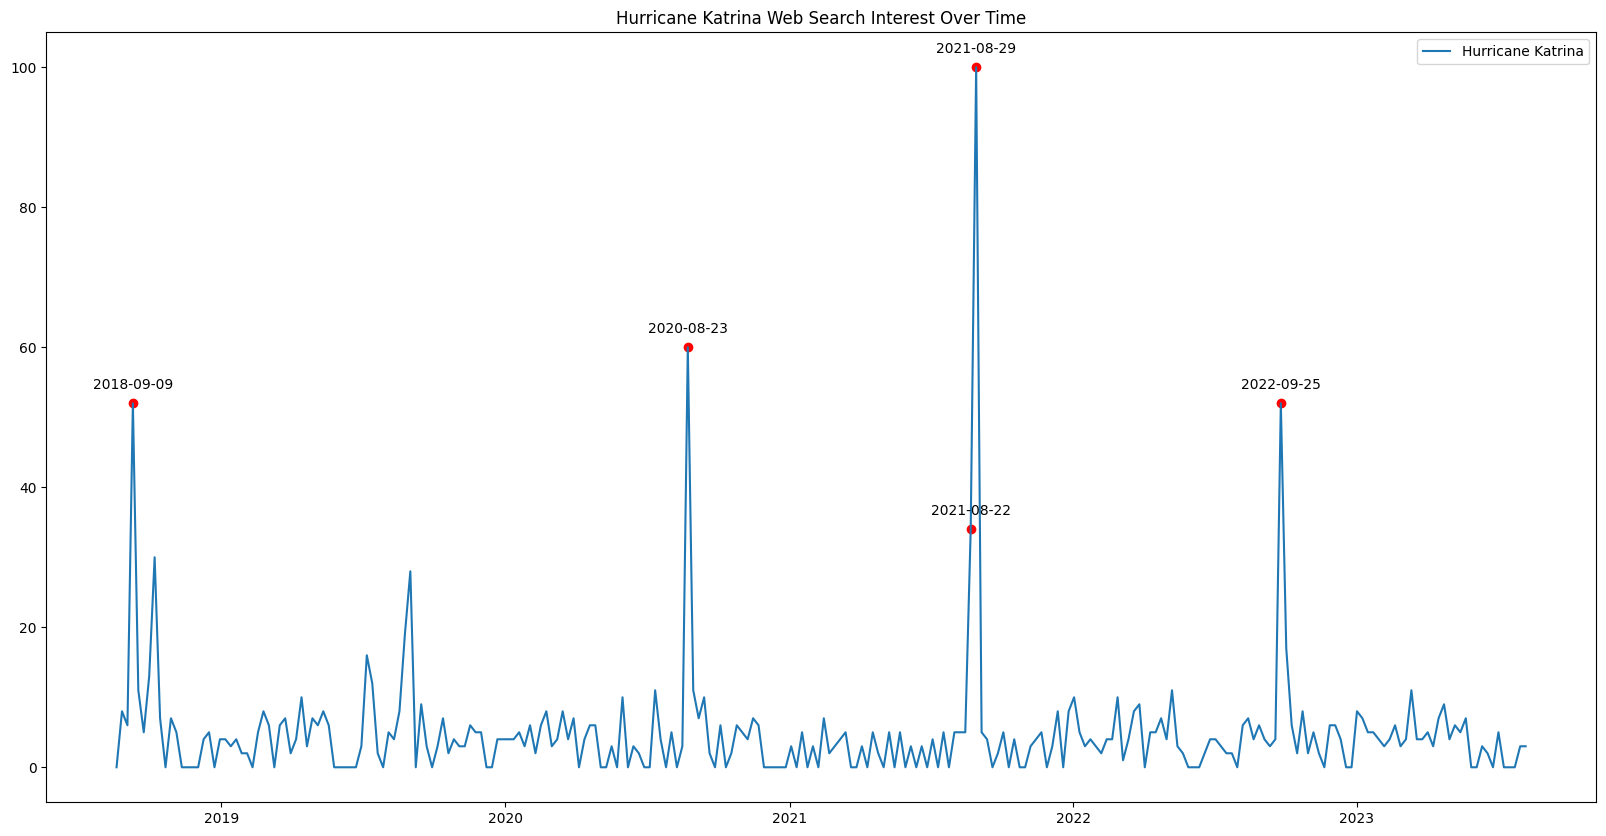

In [8]:
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y')
recent_hk_df = pytrends.interest_over_time()
recent_hk_peaks_df = recent_hk_df[recent_hk_df[kw_list[0]] > 30]

fig, ax = mplt.subplots(figsize=(20,10))
for kw in kw_list:
    ax.plot(recent_hk_df.index, recent_hk_df[kw])
    ax.scatter(recent_hk_peaks_df.index, recent_hk_peaks_df[kw], color='red', label=recent_hk_peaks_df[kw])

for i, row in recent_hk_peaks_df.iterrows():
  ax.annotate(text=i.strftime('%Y-%m-%d'), xy=(i, row[kw_list[0]]), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_title('Hurricane Katrina Web Search Interest Over Time')
ax.legend(kw_list)
mplt.show()

Here, I was curious if and how often Hurricane Katrina was still searched recently, and did not expect these findings.

I filtered the data such that only the peaks (roughly >30) had points labelled with dates.

There is an obvious pattern that search interests spike globally around every August to September. This could be because

1) There is a global effort to remember those lost in Hurricane Katrina, and her devastating effects on the community.

2) Every year around this time, it is hurricane/extreme weather season and Hurricane Katrina, notable for her devastation, is suggested by Google, helping many prepare for such situations

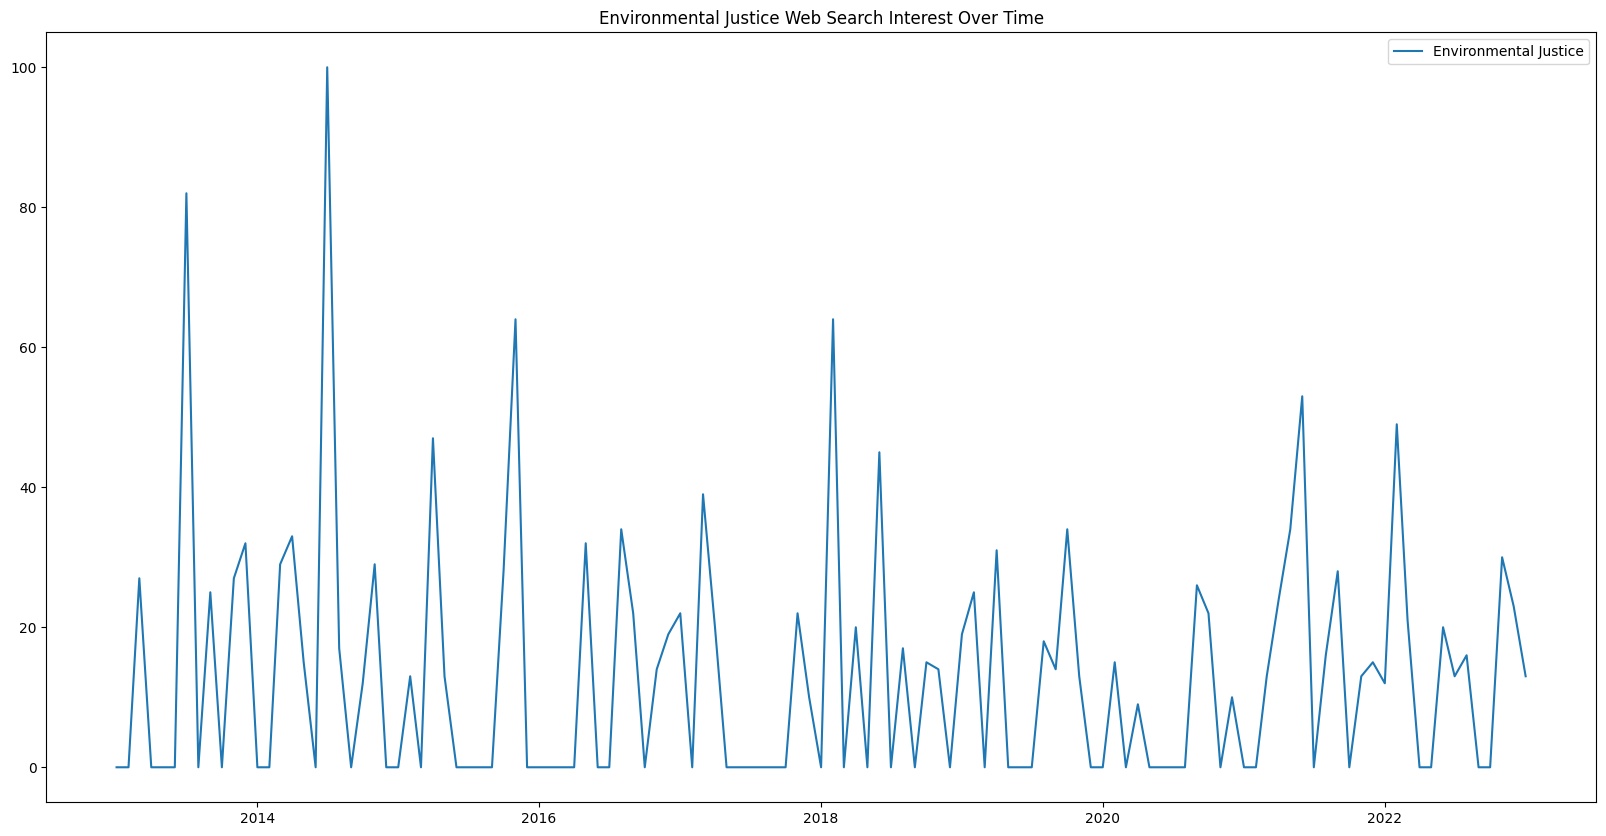

In [9]:
kw_list = ["Environmental Justice"]
pytrends.build_payload(kw_list, cat=0, timeframe='2013-01-01 2023-01-01')
ej_df = pytrends.interest_over_time()

fig, ax = mplt.subplots(figsize=(20,10))
for kw in kw_list:
    ax.plot(ej_df.index, ej_df[kw])
ax.set_title('Environmental Justice Web Search Interest Over Time')
ax.legend(kw_list)
mplt.show()

This is interesting, in that I expected Environmental Justice to be a hot theme more recently now than ever, yet it seems it has mostly been stagnant. However, it is gaining more traction compared to the past, as evident by the lack of horizontal lines at 0. This also points to a greater internal awareness of what Environmental Justice is, such that it sees regularity in usage and search.

Perhaps there was a hit piece article on Environmental Justice around the end of 2013 to explain the spike.

3. Download us_disasters_table.csv from Canvas. Create a new variable (you may want to use the mutate function) called new_cost, which takes Damage.cost.US and converts it to numeric values. You can use the money_numeric function below to do so.

```
library(stringr)
# function to conver "X billion" or "Y million" into numeric values
money_numeric <- function(money){
  # get numeric amount (we will use the first cost provided, although this may cause issues)
  num <- str_extract(money, "\\$([0-9,.]+)")
  # remove the dollar sign
  num %<>%
    str_remove_all("\\$")
  
  # get the million/billion value
  order <- str_extract(money, "million|billion")
  # replace these with appropriate number of zeros
  order %<>%
    str_replace("million", "1000000") %>%
    str_replace("billion", "1000000000")
  
  # create value
  val = as.numeric(num)*as.numeric(order)
  
  return(val)
}
```
Examine the new cost variable using the View() function. Do you feel that the function did a reasonable job of converting the damage costs into numeric values? Why or why not?


In [11]:
import re

def money_numeric(money: object):
    money = str(money)

    # get numeric amount (Using first cost provided, although this may cause issues)
    matched = re.search(r'\$([0-9,.]+)', money)
    if matched is None:
        return None
    # removing the dollar sign
    num = matched.group(1).replace('$', '')

    # get the million/billion value
    order_matched = re.search(r'million|billion', money)
    if order_matched is None:
        return None
    order = order_matched.group()
    # replace these with appropriate number of zeros
    if order == 'million':
        order = '1000000'
    elif order == 'billion':
        order = '1000000000'

    # create value
    val = float(num) * float(order)
    return val

disasters_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/us_disasters_table.csv")
disasters_df.insert(4, "Damage.costUS.Numeric", disasters_df["Damage.costUS."].apply(money_numeric))
disasters_df

,Year,Disaster,Death.toll,Damage.costUS.,Damage.costUS.Numeric,Main.article,Location,Notes
0,2023,Tornado outbreak,33,$4.3 billion,4.300000e+09,"Tornado outbreak of March 31 – April 1, 2023","Southern United States, Midwestern United States",NaN
1,2023,Tornado outbreak,25,$1.9 billion,1.900000e+09,"Tornado outbreak of March 24–27, 2023",Southern United States,NaN
2,2023,Flooding and Tornado outbreak,13,$4.5 billion,4.500000e+09,Early-March 2023 North American storm complex,"Southwestern United States, Southeastern Unite...",NaN
3,2023,"Derecho, Tornado outbreak and Winter storm",14,NaN,NaN,February 2023 North American storm complex,"Western United States, Southern United States ...",NaN
4,2022,Winter storm,106,$5.4 billion,5.400000e+09,December 2022 North American winter storm,"Western United States, Midwestern United State...",NaN
...,...,...,...,...,...,...,...,...
168,1888,Blizzard,400,NaN,NaN,Great Blizzard of 1888,Northeast,Fatalities estimated
169,1888,Cold wave,Unknown,NaN,NaN,1888 Northwest Cold Wave,Northwest,NaN
170,1871,Wildfire,"1,500 – 2,500",NaN,NaN,Peshtigo fire,Wisconsin,Deadliest firestorm in United States history
171,1862,Flood,">5,000",$100 million (1862 USD); $262.2 billion (2020 ...,1.000000e+08,Great Flood of 1862,"California, Oregon, Utah, and the territories ...",An atmospheric river led to 43 continuous days...


No, the function did not do the numeric conversion justice. Textual "million" or "billion" is much easier to read in a glance than many 0s, especially if the 0s were not shortened via scientific notation. Furthermore, as seen in row 171, there is an unrecoverable loss of information - currency and segmented costs due to the nature of disasters that convey critical information. If this column were indeed to be removed, we must be careful to note parts of the information that could not be represented elsewhere.

However, the numeric values certainly have their merit, in that now it is easier to manipulate for further data processing since they are just floating point numbers.

4. Using the same data, with the new cost variable, plot damage costs alongside one of the other variables. What type of relationship do you see? Are there reasons we should trust, or not trust, this apparent relationship?

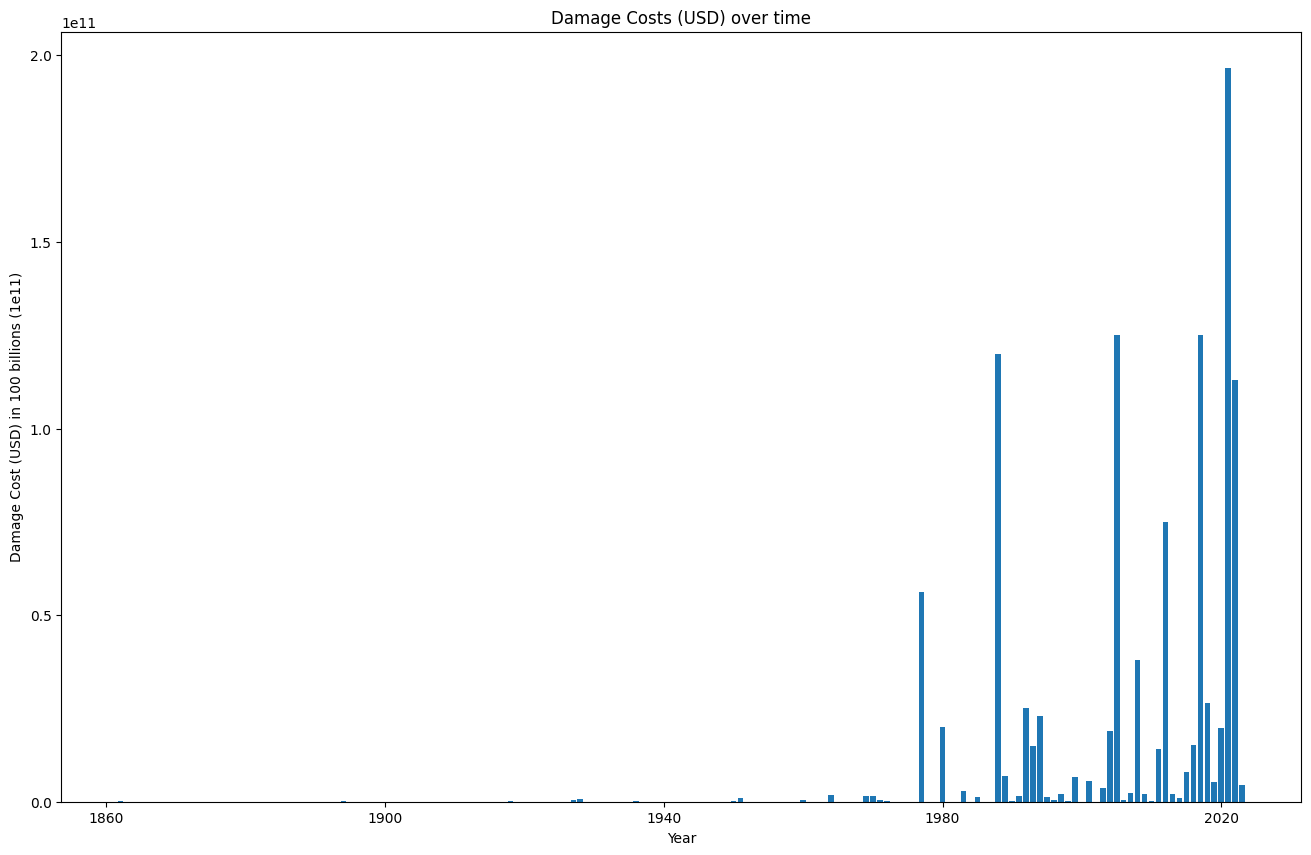

In [12]:
def format_year(year):
  if type(year) is not int:
    if "to" in year:
      # 1931 to 1939
      return int(year.split(" to ")[0])
    else:
      # 2013 / 2014
      return int(year.split(" / ")[0])
  return year
disasters_df["Year"] = disasters_df["Year"].apply(format_year)

mplt.figure(figsize=(16,10))
mplt.bar(disasters_df["Year"], disasters_df["Damage.costUS.Numeric"])
mplt.xlabel("Year")
mplt.ylabel("Damage Cost (USD) in 100 billions (1e11)")
mplt.xticks(ticks=np.arange(1860, 2025, step=40))
mplt.yticks(ticks=np.arange(0, 2.1e11, step=0.5e11))
mplt.title("Damage Costs (USD) over time")
mplt.show()

A plot of the cost over time shows a general upward trend of damage costs.

We may trust this relationship, as over time, our technology advances and our buildings and infrastructure become more valuable and thus destruction incurs much higher costs.

However, at the same time, this is also true of the global population's wealth, which has been increasing exponentially. It is difficult to find an estimate of the global wealth back in 1860, but as of 2022, it stands at [USD 463.6 trillion](https://www.credit-suisse.com/about-us-news/en/articles/media-releases/global-wealth-report-2022---record-wealth-growth-in-2021-tapered-202209.html#:~:text=Aggregate%20global%20wealth%20totaled%20USD,USD%2087%2C489%20at%20year%2Dend.) (2022, Credit Suisse).

Additionally factoring in inflation (3,564.18% since 1860), damage costs could not have been that minor as represented on the graph. Therefore, this relationship can only be said to be partially true.

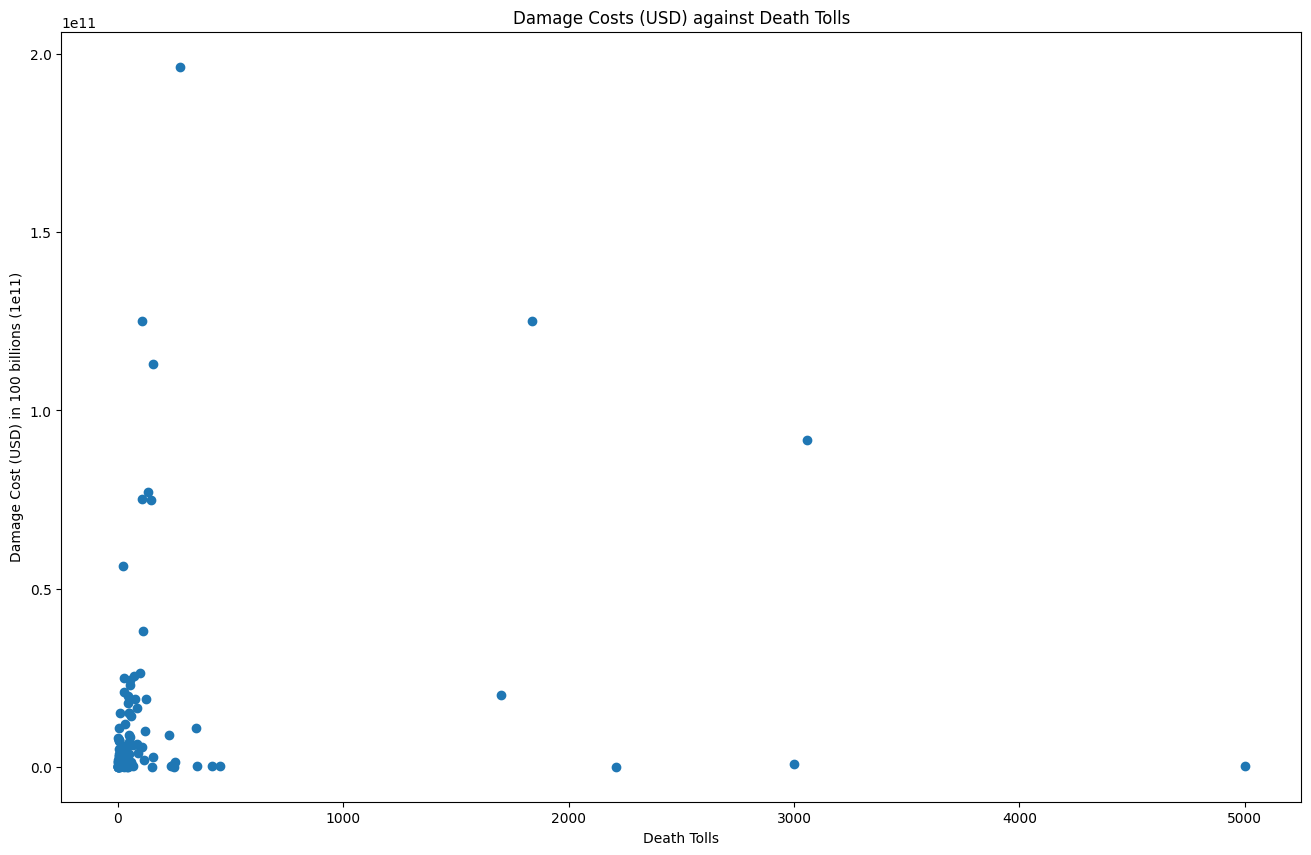

In [13]:
def format_death_toll(death_toll):
    # Remove 'Unknown'
    if death_toll == 'Unknown':
        return None

    # Remove commas from numbers and convert to integer
    death_toll = re.sub(r',', '', death_toll)
    if death_toll.isdigit():
        return int(death_toll)

    # 1,500 – 2,500
    if '-' in death_toll:
        range_values = death_toll.split('-')
        start_value = int(range_values[0])
        end_value = int(range_values[1])
        average_value = (start_value + end_value) / 2
        return int(average_value)

    # >5,000 or 100,000+
    if '>' in death_toll or '+' in death_toll:
        death_toll = re.sub(r'[^\d]', '', death_toll)
        return int(death_toll)

    return None

disasters_df["Death.toll"] = disasters_df["Death.toll"].apply(format_death_toll)

mplt.figure(figsize=(16,10))
mplt.scatter(disasters_df["Death.toll"], disasters_df["Damage.costUS.Numeric"])
# mplt.yscale("log")
mplt.xlabel("Death Tolls")
mplt.ylabel("Damage Cost (USD) in 100 billions (1e11)")
mplt.yticks(ticks=np.arange(0, 2.1e11, step=0.5e11))
mplt.title("Damage Costs (USD) against Death Tolls")
mplt.show()

A plot of the cost against death tolls does not show a clear trend. A high death toll can have minimal damage costs, or vice versa.

This could be because damage cost is evaluated as infrastructural cost. Expensive infrastructures may not necessarily be located only in urban settings where the general population is most likely to reside. For example, nuclear power plants are prone to damage during disasters and incur high damage costs, but are built far away from civilization in rural areas, thus incurring low death tolls.

5. Choose an API from one of the lists above, such as The Guardian API, or one that you find on your own. Try to download some data! Show a snippet of this data (for example, using the head() function), and comment on the types of questions that you might answer with it. You don’t need to do any data cleaning or analysis yourself for this question.

In [ ]:
import requests


API_KEY = "..."
URL = "https://content.guardianapis.com/search"
PARAMS = {
    "q": "hurricane",
    "api-key": API_KEY
}

response = requests.get(URL, params=PARAMS)
data = response.json()

articles = data["response"]["results"]
# 100 results
for i in range(2, 50):
  response = requests.get(URL, params=PARAMS)
  data = response.json()
  articles.extend(data["response"]["results"])

articles_df = pd.DataFrame(articles, columns=["type", "sectionName", "webPublicationDate", "webTitle", "webUrl"])

articles_df["webPublicationDate"] = pd.to_datetime(articles_df["webPublicationDate"])
articles_df = articles_df.sort_values(by="webPublicationDate", ascending=False)
articles_df.drop_duplicates(subset=["webTitle"], keep="first", inplace=True)

articles_df.head(20)

I used The Guardian API

What emotions does the media portray experiences related to hurricanes?

How does the media politically charge perceptions on hurricanes?

Which regions does the media like to report hurricanes on?

In [ ]:
# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "PS2_AndrewYu.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2
!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME